# JQA Subject Correlations

In [10]:
# Import necessary libraries.
import re, nltk, warnings, csv, sys, os, pickle, string
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import chain
from scipy import stats
import matplotlib.pyplot as plt

# Declare directory location to shorten filepaths later.
abs_dir = "/Users/quinn.wi/Documents/"

# Read in file; select columns; drop rows with NA values (entries without a named person).
df = pd.read_csv(abs_dir + 'Data/Output/ParsedXML/JQA_Subjects-dataframe.txt',
                 sep = '\t') \
    .drop(columns = ['file']) \
    .dropna()

# Unnest subject headings. 
df['subject'] = df['subject'].str.split(',')
df = df.explode('subject')

# Remove leading and trailing whitespace.
df['subject'] = df['subject'].str.strip()

# Remove rows with subject of "The".
df = df[~df['subject'].isin(['The'])]

print (f'Number of unique subject headings: {len(df["subject"].unique())}\nDF Shape: {df.shape}')

df.head()

Number of unique subject headings: 70
DF Shape: (5913, 4)


,entry,date,subject,text
0,jqadiaries-v30-1817-10-01,1817-10-01,Adams Family Residences,1. IV:30. Wednesday. Wrote a Letter to J. L. S...
0,jqadiaries-v30-1817-10-01,1817-10-01,Commerce,1. IV:30. Wednesday. Wrote a Letter to J. L. S...
1,jqadiaries-v30-1817-10-02,1817-10-02,Foreign Relations,2. IV: Continued drafting instructions for Rus...
1,jqadiaries-v30-1817-10-02,1817-10-02,Health and Illness,2. IV: Continued drafting instructions for Rus...
1,jqadiaries-v30-1817-10-02,1817-10-02,South American Wars of Independence,2. IV: Continued drafting instructions for Rus...


## Create Adjacency Matrix of Subjects

In [12]:
%%time

# Create adjacency matrix.
adj = pd.crosstab(df['entry'], df['subject'])

# Convert entry-person matrix into an adjacency matrix of persons.
adj = adj.T.dot(adj)

# Change same-same connections to zero.
np.fill_diagonal(adj.values, 0)

adj

CPU times: user 65 ms, sys: 3.24 ms, total: 68.2 ms
Wall time: 67.4 ms


subject,Adams Family Finances,Adams Family Relations,Adams Family Residences,Adams-Onis Treaty,African Americans,American Revolution,Anglo-American Treaty of 1818,Anti-Slavery Movements,Asylum Movement,Bank of the United States,...,Telegraph,Texas Annexation (1845),Textile Industry,Treaty of Ghent,U.S. Constitution,Unitarianism,Utopian Communities,War of 1812,West,Westward Exploration and Expansion/Westward Migration/Manifest Destiny
subject,,,,,,,,,,,,,,,,,,,,,
Adams Family Finances,0,22,52,14,6,2,1,3,0,29,...,0,0,0,14,13,0,1,11,2,1
Adams Family Relations,22,0,19,10,2,2,1,0,0,2,...,0,0,0,2,8,0,0,4,1,2
Adams Family Residences,52,19,0,4,3,3,0,0,0,3,...,0,0,0,1,15,0,0,8,0,0
Adams-Onis Treaty,14,10,4,0,6,6,1,1,0,11,...,0,7,0,20,29,0,1,15,34,9
African Americans,6,2,3,6,0,3,0,4,0,0,...,0,0,0,3,9,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unitarianism,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
Utopian Communities,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
War of 1812,11,4,8,15,3,6,0,0,0,5,...,0,0,0,21,12,1,0,0,7,4


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


<Figure size 1152x864 with 0 Axes>

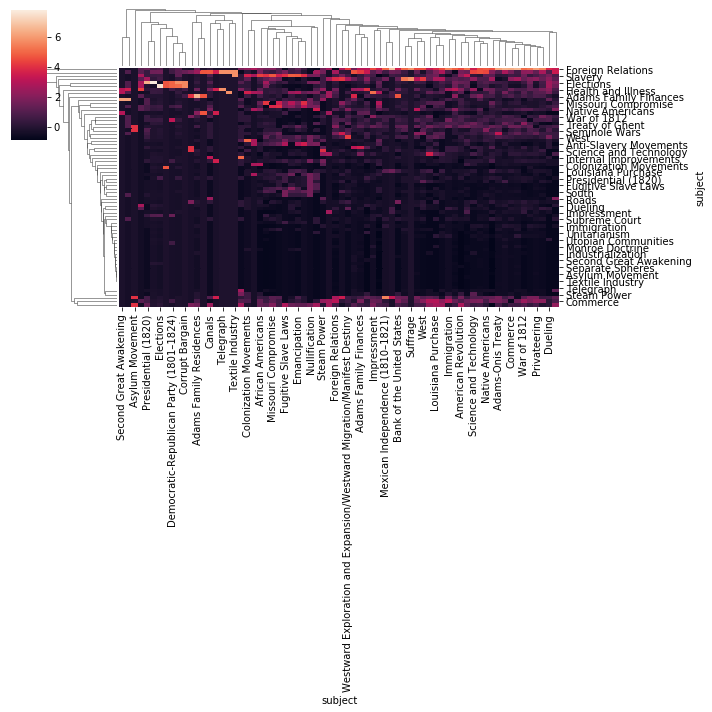

<Figure size 1152x864 with 0 Axes>

In [21]:
%time

sns.clustermap(adj, z_score = 1)

plt.figure(figsize=(16, 12))